# Install YOLOv5


In [ ]:
!pwd
!ls

/content
sample_data


In [ ]:
!mkdir yolo_test1

In [ ]:
%cd yolo_test1/

/content/yolo_test1


In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
# install dependencies as necessary
!pip install -qr requirements.txt roboflow
import torch
import os
from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (11717/11717), done.
/content/yolo_test1/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 51.4 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=a674983f-d884-b3e9-b67e-dc40fd1ba453, L2_cache_size=4MB)


## Download a Dataset

Run the code below to authenticate with Roboflow and download the dataset. Follow the link to generate an authentication token.

Alternatively, provide an API key like so: `rf = Roboflow(api_key=...)`

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/yolo_test1/datasets"

In [ ]:
!pip install roboflow

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="nn0GYKyDNYl4ybs1YTOT")
project = rf.workspace("yolo-m2t6a").project("yolo_detect_mini")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/yolo_test1/datasets/yolo_detect_mini-1 in yolov5pytorch:: 100%|██████████| 6002/6002 [00:01<00:00, 4739.93it/s]


# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights.
- **name:** result names
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 150 epochs
# time its performance
%%time
%cd /content/yolo_test1/yolov5/
!python train.py \
  --img 416 \
  --batch 8 \
  --epochs 20 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  with torch.cuda.amp.autocast(amp):
      10/19       1.2G    0.05137    0.05428    0.03322        119        416:  73% 191/262 [00:37<00:11,  6.40it/s]/content/yolo_test1/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/19       1.2G    0.05135    0.05431    0.03318         98        416:  73% 192/262 [00:37<00:11,  6.14it/s]/content/yolo_test1/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/19       1.2G    0.05138    0.05427    0.03319        102        416:  74% 193/262 [00:37<00:11,  6.09it/s]/content/yolo_test1/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

# Evaluate Custom YOLOv5 Detector Performance

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/yolov5s_results/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

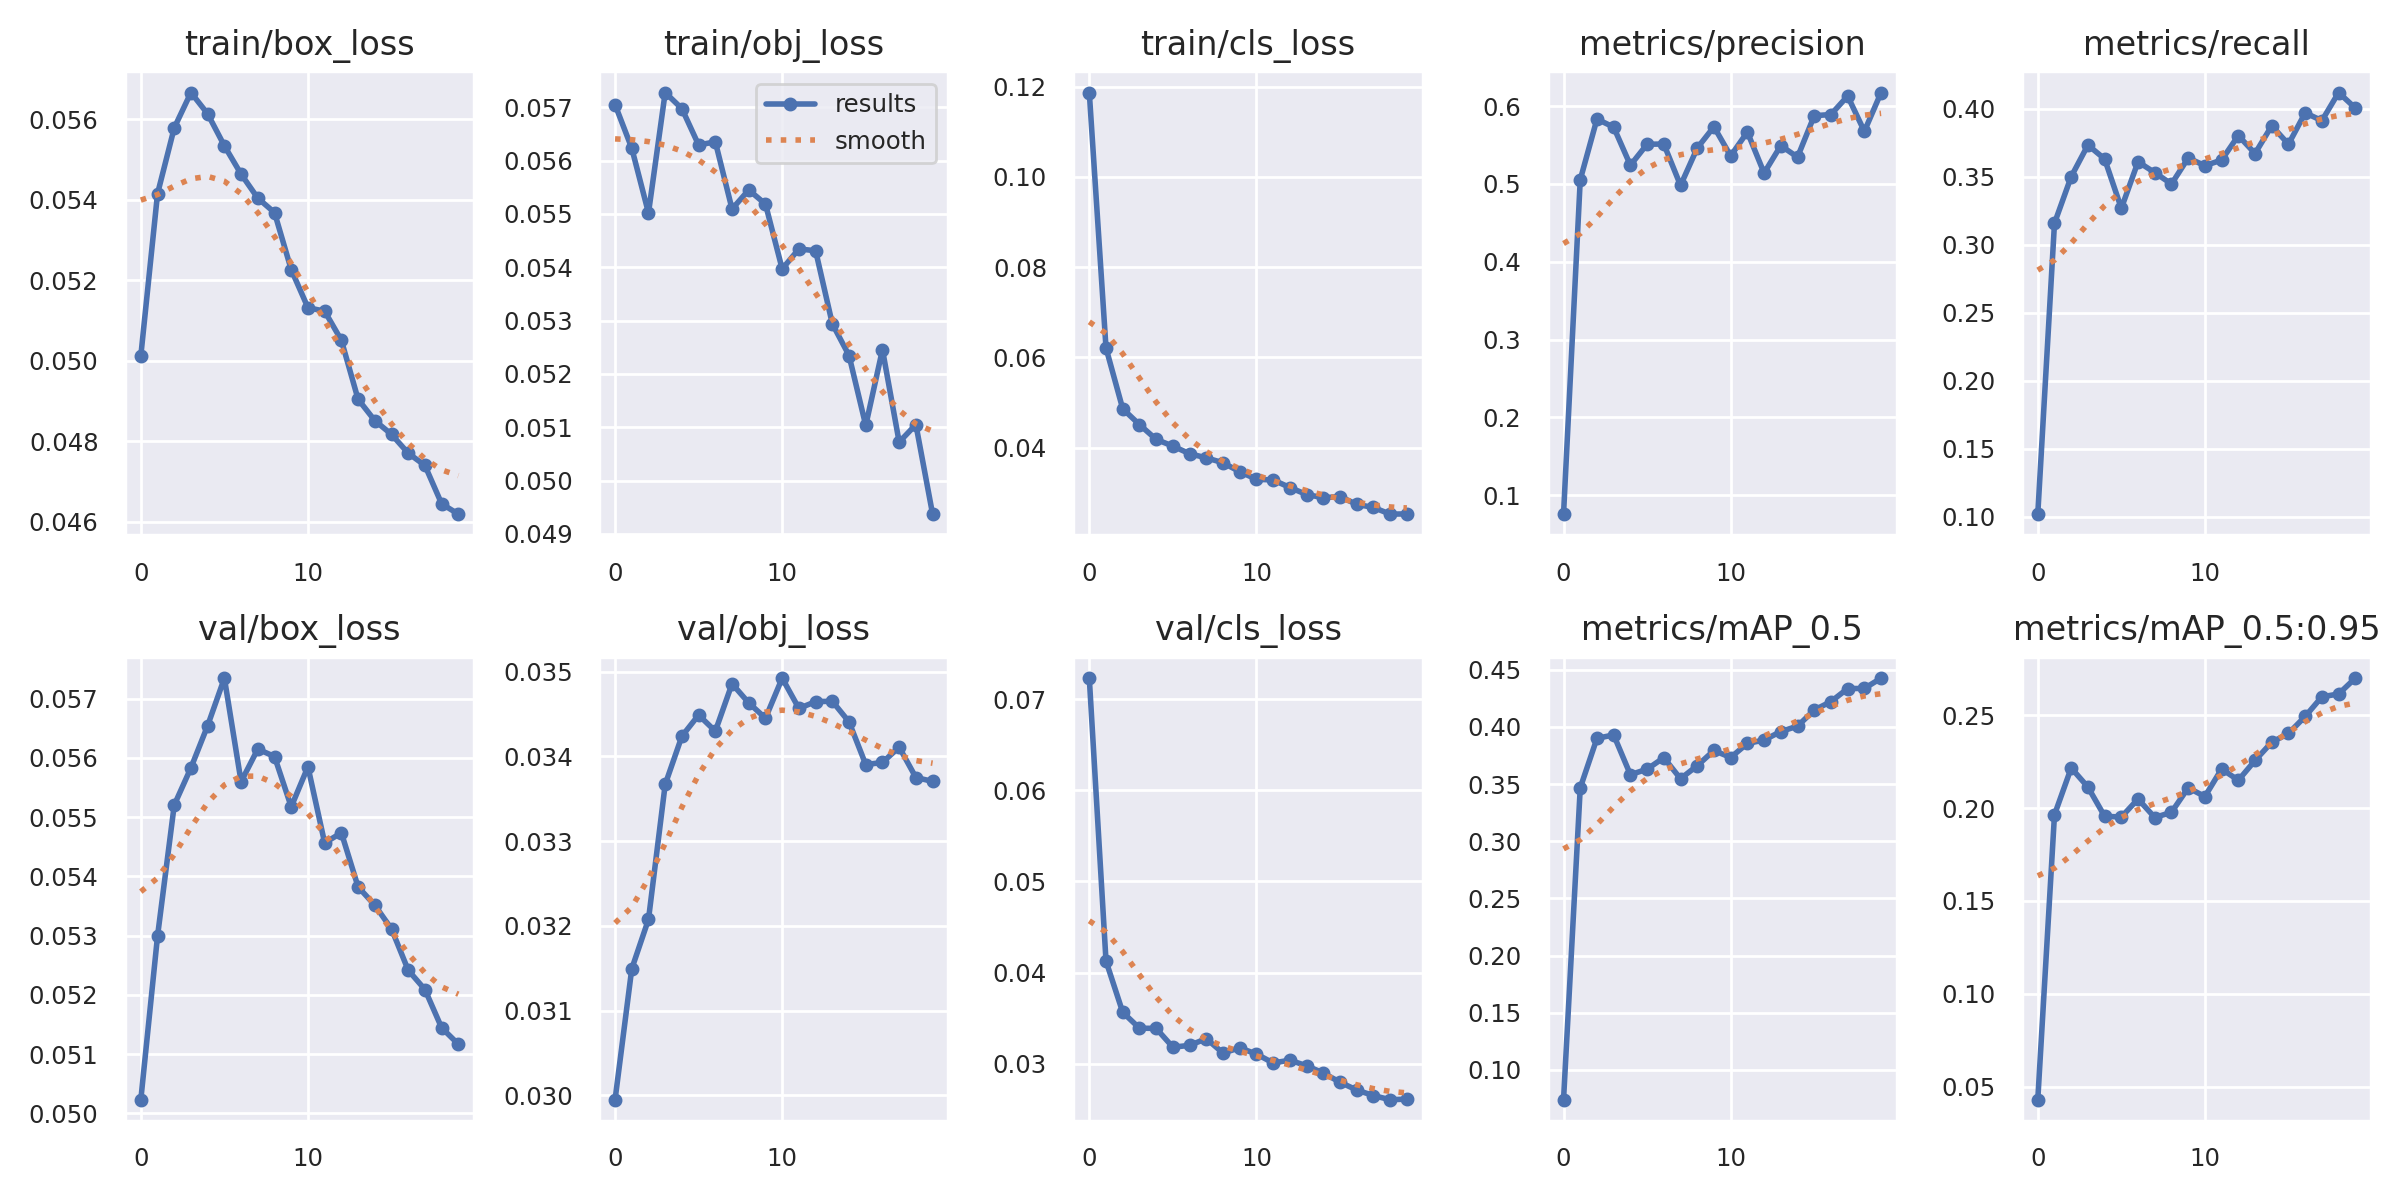

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolo_test1/yolov5/runs/train/yolov5s_results/results.png', width=1000)

###  Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.



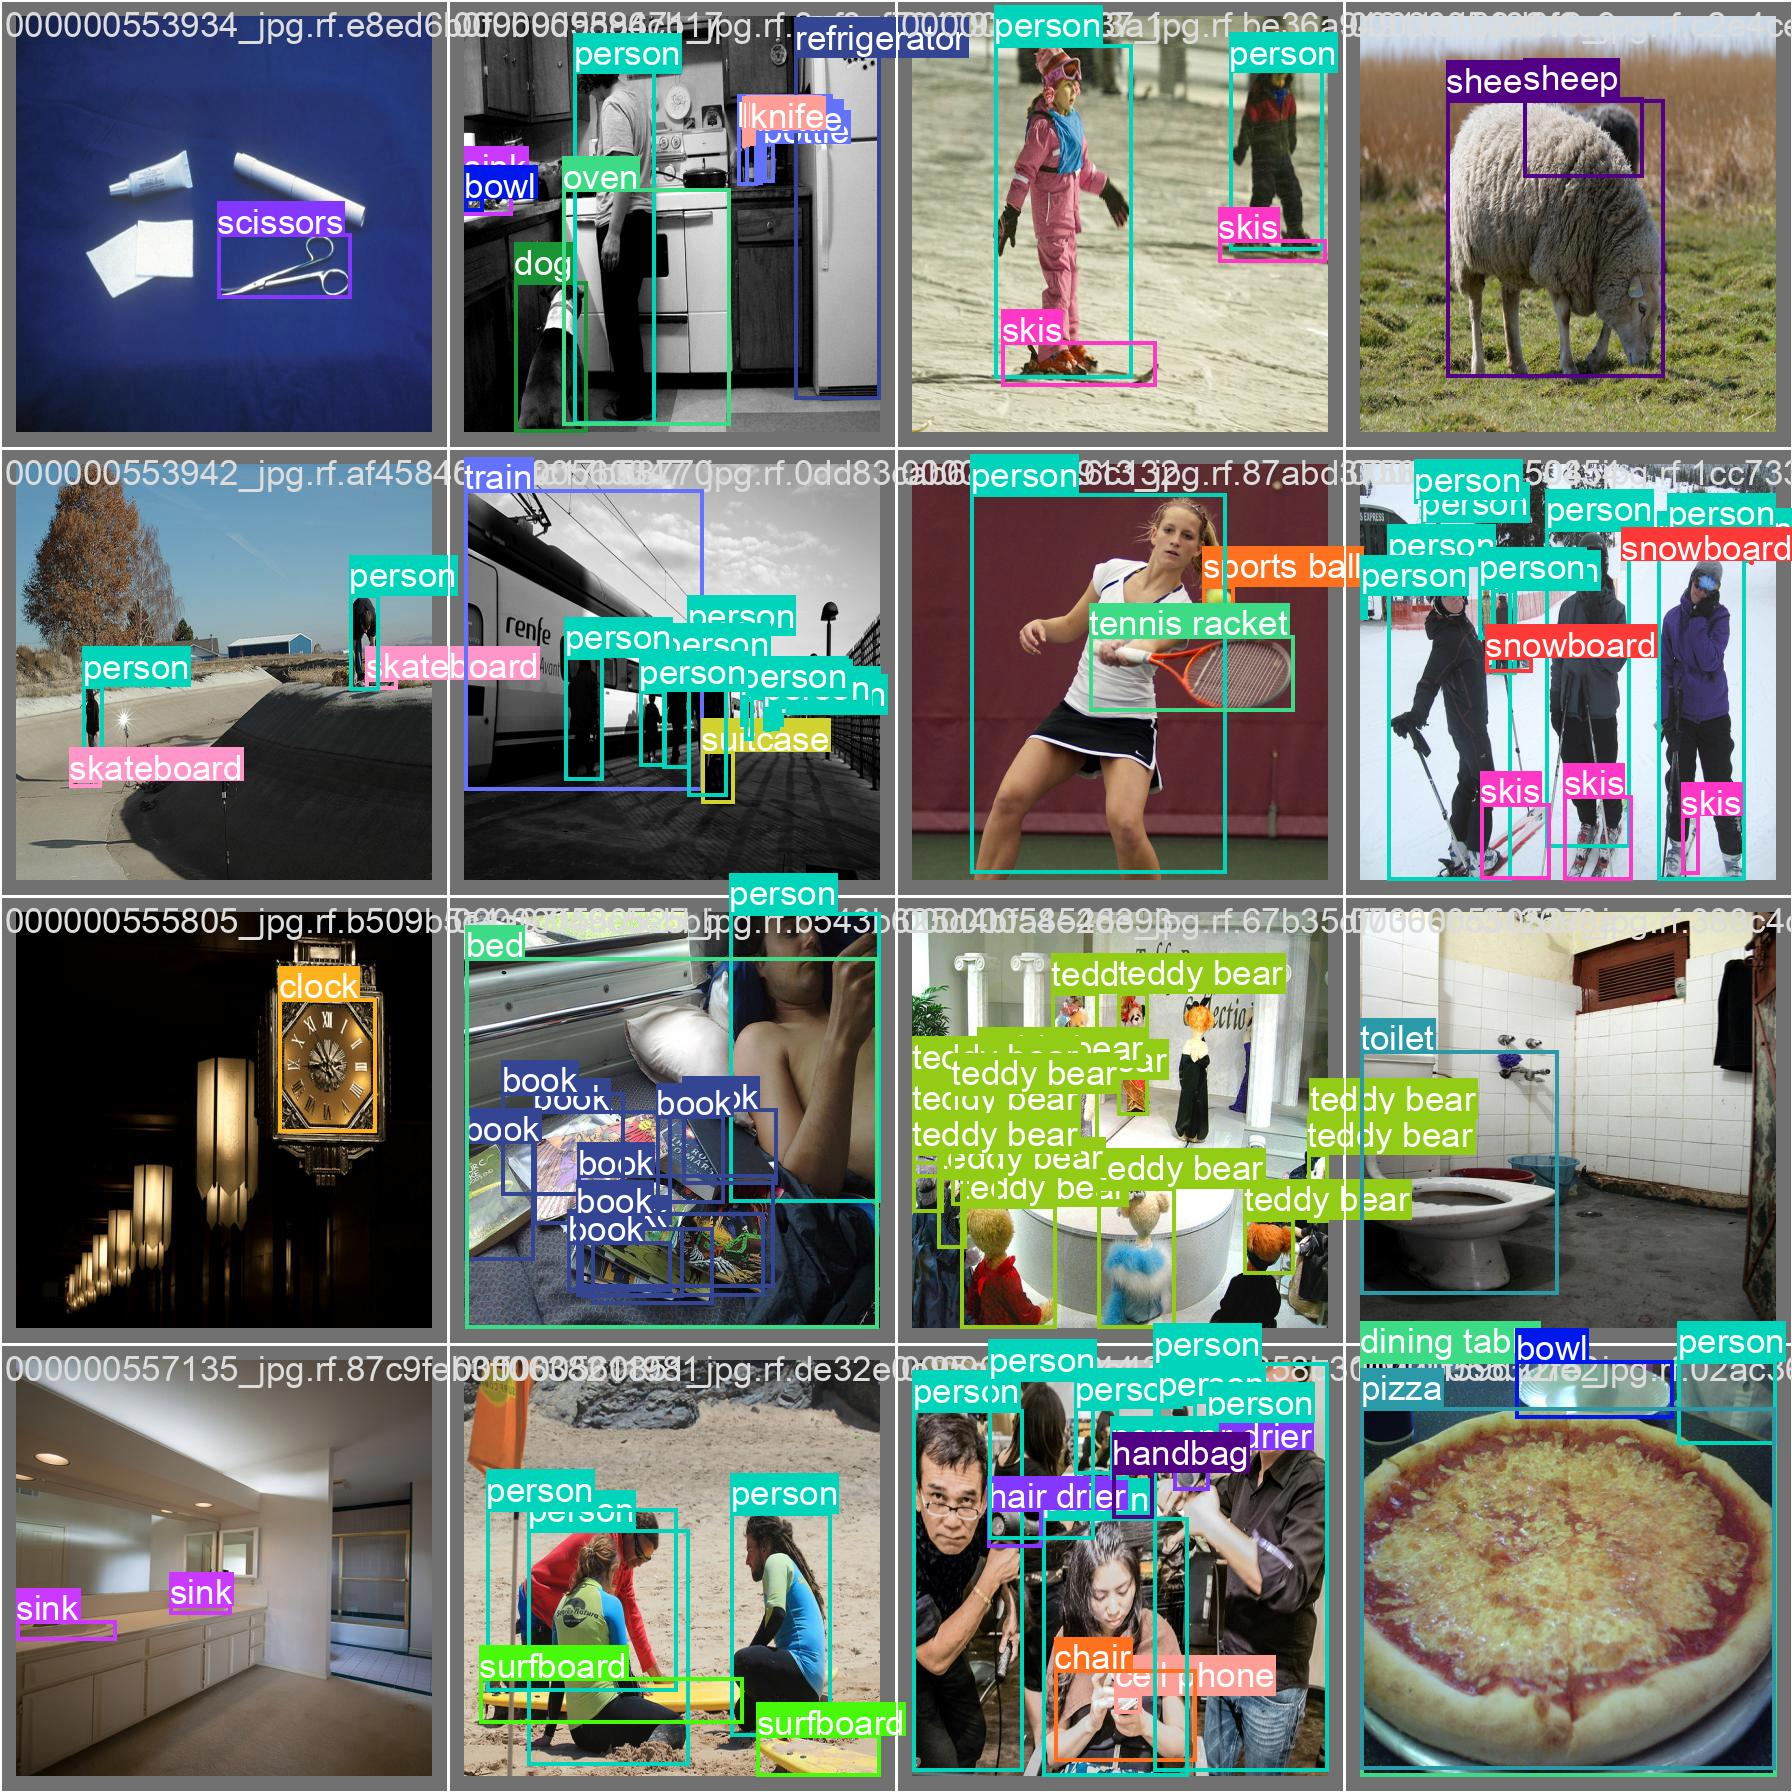

In [ ]:
Image(filename='/content/yolo_test1/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


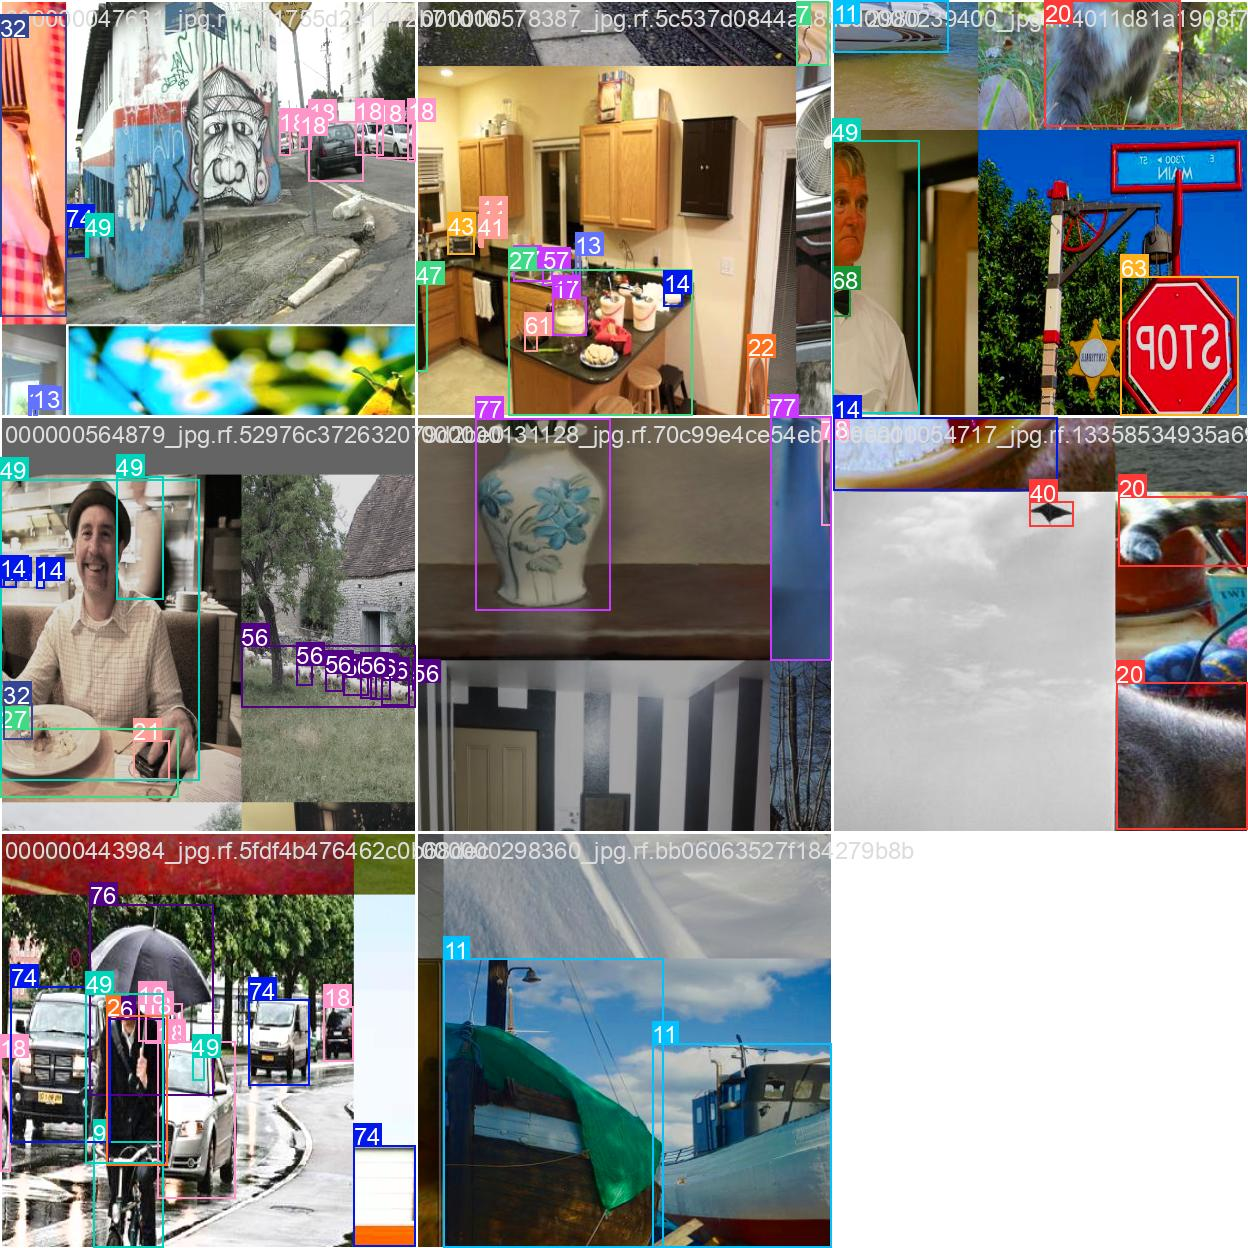

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolo_test1/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

# Run Inference With Trained Weights

Next, we can run inference with a pretrained checkpoint on all images in the `test/images` folder to understand how our model performs on our test set.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls /content/yolo_test1/yolov5/runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%cd /content/yolo_test1/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/

/content/yolo_test1/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolo_test1/datasets/yolo_detect_mini-1/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/300 /content/yolo_test1/datasets/yolo_detect_mini-1/test/images/000000005352_jpg.rf.0f5fc7ae2cb0299e2d188883aed4c7ba.jpg: 416x416 1 cup, 1 dining table, 1 donut, 7.4ms
image 2/300 /con

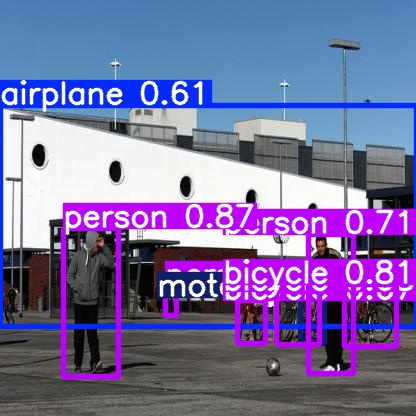

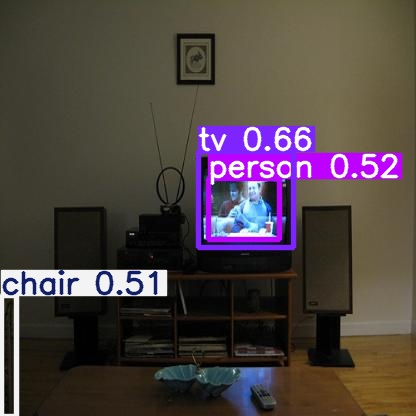

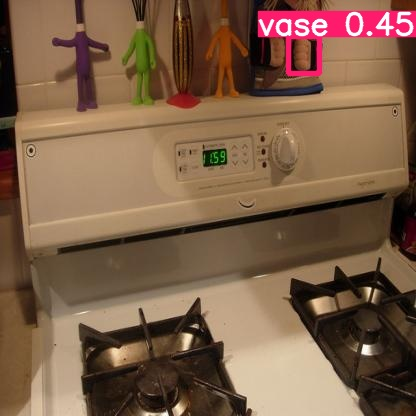

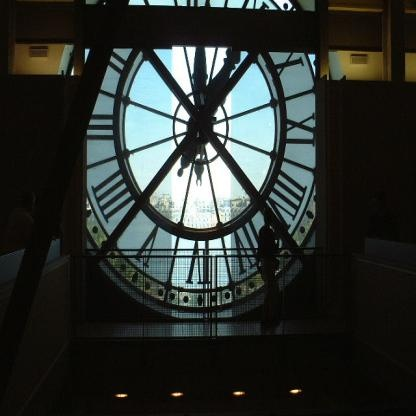

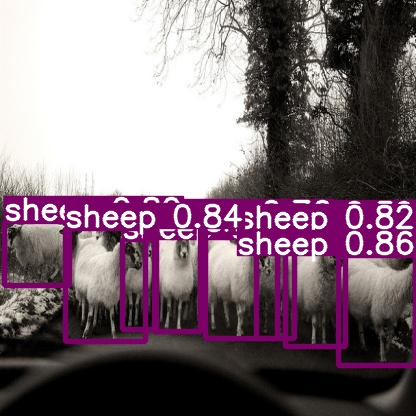

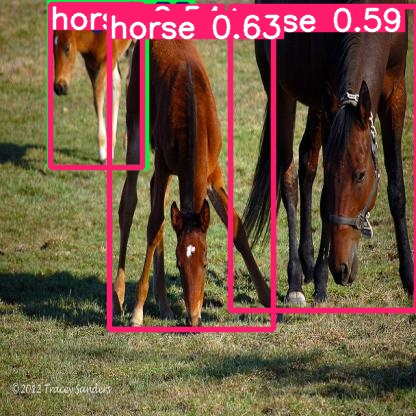

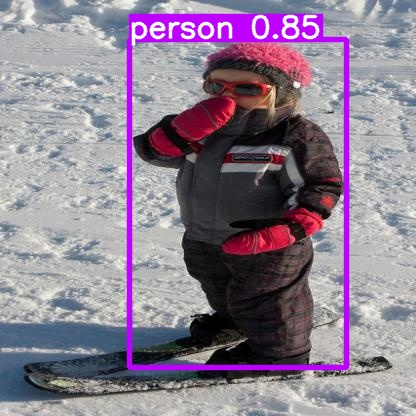

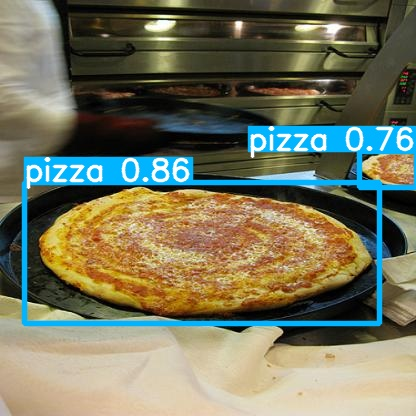

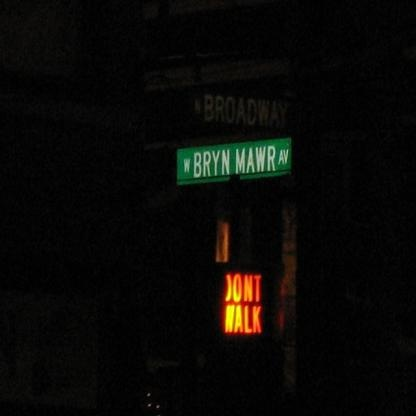

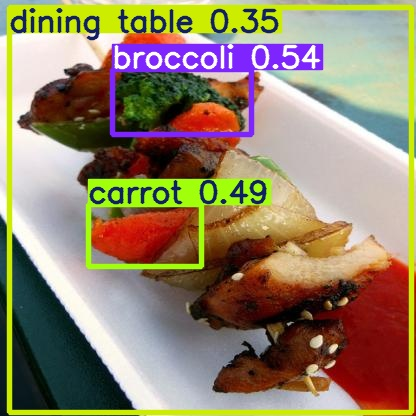

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolo_test1/yolov5/runs/detect/exp/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))